<a href="https://colab.research.google.com/github/Quang-Nguyen-Van/MSE_Image-Video-Processing/blob/main/Quizz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
# Load data from google drive into the runtime.
!rmdir data
!mkdir data

!gdown --folder https://drive.google.com/drive/folders/1iXH61NqGF69w6sB5T9IyTBH4_4MLupTS?usp=sharing -O /content/data/

rmdir: failed to remove 'data': Directory not empty
mkdir: cannot create directory ‘data’: File exists
Retrieving folder list
Processing file 1oFY5lj1c5J-2jIq1e8_ViWsMbcVZgmRM nature.jpg
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1oFY5lj1c5J-2jIq1e8_ViWsMbcVZgmRM
To: /content/data/Quizz/nature.jpg
100% 7.93k/7.93k [00:00<00:00, 7.31MB/s]
Download completed


In [84]:
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import cv2
import numpy as np
from skimage.util import random_noise

imgFile = '/content/data/Quizz/nature.jpg'

Text(0.5, 1.0, 'Blue layer')

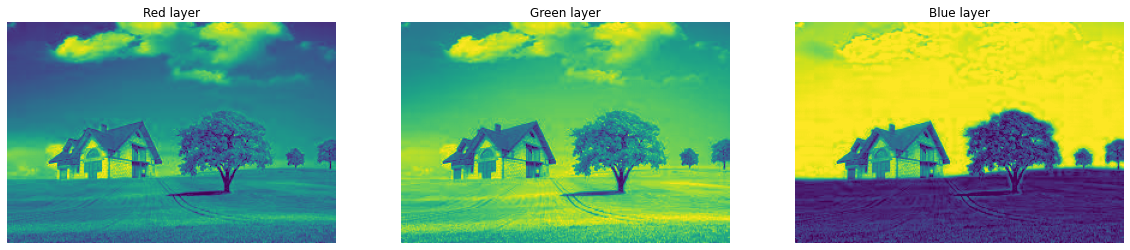

In [85]:
# Load image
Img = cv2.imread(imgFile)  # Load image
destRGB = cv2.cvtColor(Img, cv2.COLOR_BGR2RGB)
r,g,b = cv2.split(destRGB)

# Cau 1

fig = plt.figure(figsize=(20, 20))  
fig.add_subplot(1, 3, 1)
plt.imshow(r)
plt.axis('off')
plt.title('Red layer')
 
fig.add_subplot(1, 3, 2)
plt.imshow(g)
plt.axis('off')
plt.title('Green layer')


fig.add_subplot(1, 3, 3)
plt.imshow(b)
plt.axis('off')
plt.title('Blue layer')


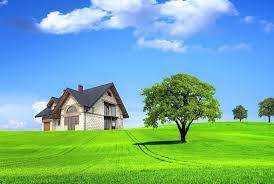

In [86]:
# Cau 2
destBGR = cv2.cvtColor(destRGB, cv2.COLOR_RGB2BGR)
cv2_imshow(destBGR)

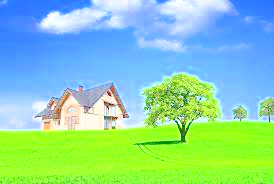

In [87]:
# Cau 3
hsv = cv2.cvtColor(destRGB, cv2.COLOR_RGB2HSV) #convert it to hsv
increase = 100
h, s, v = cv2.split(hsv)
v = np.where(v <= 255 - increase, v + increase, 255)
final_hsv = cv2.merge((h, s, v))

img = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
cv2_imshow(img)

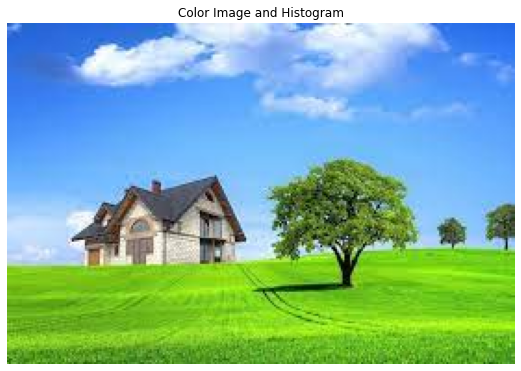

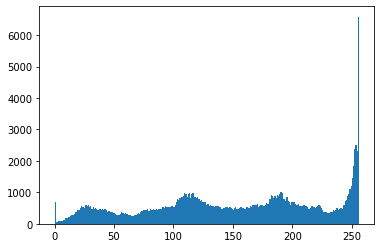

In [88]:
# Cau 4
# Histogram of Color Image

fig1 = plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(destRGB)
histg = cv2.calcHist([destRGB],[0],None,[256],[0,256])


plt.imshow(destRGB)
plt.axis('off')
plt.title('Color Image and Histogram')
plt.show()


plt.hist(destRGB.ravel(),256,[0,256])
plt.show()

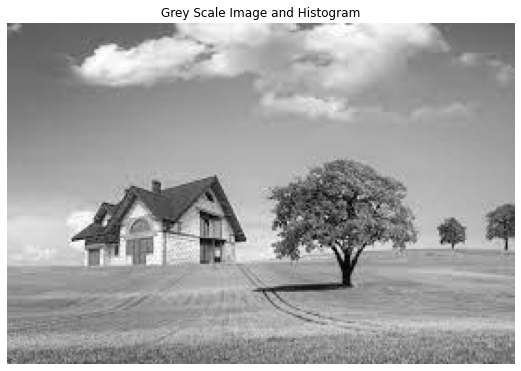

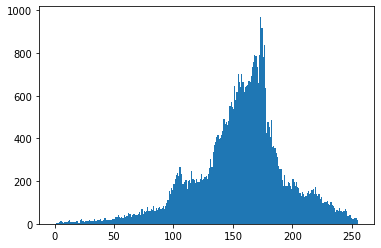

In [89]:
# Cau 4
# Histogram of Gray Scale Image
Img1 = cv2.imread(imgFile)
greyImg = cv2.cvtColor(Img1, cv2.COLOR_BGR2GRAY)
fig1 = plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(greyImg)
greyHistg = cv2.calcHist([greyImg],[0],None,[256],[0,256])


plt.imshow(greyImg, cmap='gray')
plt.axis('off')
plt.title('Grey Scale Image and Histogram')
plt.show()


plt.hist(greyImg.ravel(),256,[0,256])
plt.show()


Text(0.5, 1.0, 'Flipped image')

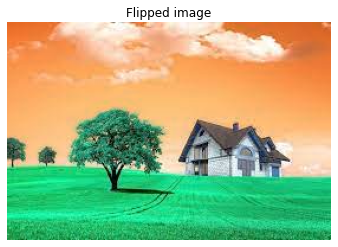

In [91]:
# Cau 5
# Flipp image from left to right
flippedImage = cv2.flip(Img1, 1)
plt.imshow(flippedImage)
plt.axis('off')
plt.title('Flipped image from left to right')

Text(0.5, 1.0, 'Image Rotated 180 degrees')

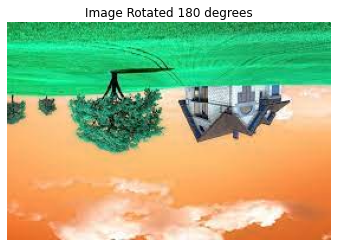

In [94]:
# Cau 5
# Rotate image clockwise 180 degrees
imgRotate180 = cv2.rotate(Img1, cv2.ROTATE_180)
plt.imshow(imgRotate180)
plt.axis('off')
plt.title('Image Rotated 180 degrees')

(184, 274, 3)


Text(0.5, 1.0, 'Cropped Image')

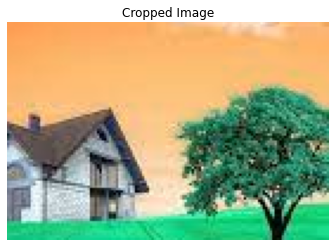

In [97]:
# Cau 5
# crop ½ central of the image
print(Img1.shape)

widt, heigt = Img1.shape[1], Img1.shape[0]
mid_x, mid_y = int(widt/2), int(heigt/2)
cw2, ch2 = int(mid_x/2), int(mid_y/2)
croppedImg = Img1[mid_y-ch2:mid_y+ch2, mid_x-cw2:mid_x + cw2]

plt.imshow(croppedImg)
plt.axis('off')
plt.title('Cropped Image')